<a href="https://colab.research.google.com/github/Hamdankim/2341720251_ML_2025/blob/main/JS09/TP_JS09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP_JS09_1 — KNN Voice Classification


In [1]:

%matplotlib inline
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/sample_data/voice.csv')
X = df.drop('label', axis=1)
y = LabelEncoder().fit_transform(df['label'])

# Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series


,0
meanfun,0.561629
IQR,0.454050
Q25,0.405747
sd,0.302533
sp.ent,0.178727
mode,0.177031
sfm,0.130442
meanfreq,0.108916
centroid,0.108916
mindom,0.099266


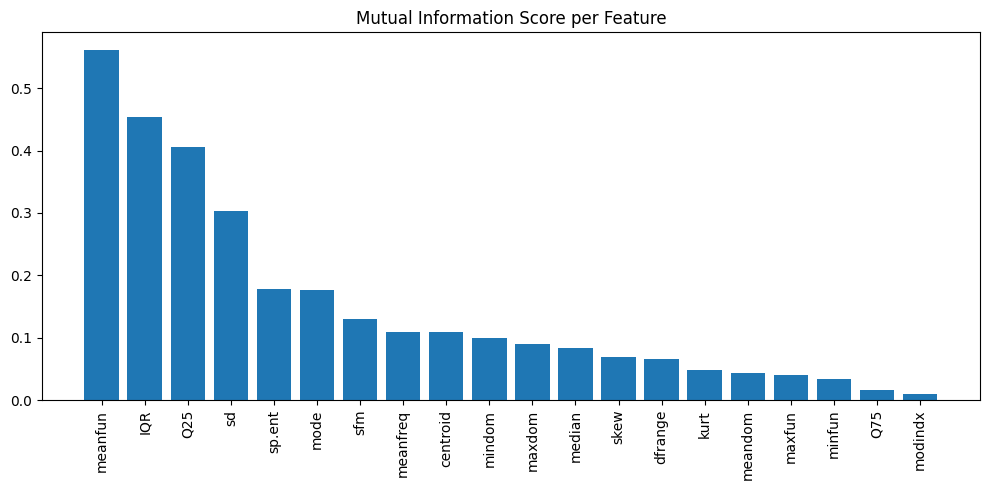

In [2]:

plt.figure(figsize=(10,5))
plt.bar(mi_series.index, mi_series.values)
plt.xticks(rotation=90)
plt.title("Mutual Information Score per Feature")
plt.tight_layout()
plt.show()


In [3]:

results = {}
scaler = StandardScaler()

for n in range(2, 11):
    top_features = mi_series.index[:n]
    Xn = X[top_features]
    Xn_scaled = scaler.fit_transform(Xn)

    X_train, X_test, y_train, y_test = train_test_split(
        Xn_scaled, y, test_size=0.2, random_state=42
    )

    best_acc = 0
    best_k = None

    for k in range(1, 21):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        if acc > best_acc:
            best_acc = acc
            best_k = k

    results[n] = (best_acc, best_k)

results


{2: (0.9779179810725552, 8),
 3: (0.9794952681388013, 5),
 4: (0.9842271293375394, 9),
 5: (0.9842271293375394, 9),
 6: (0.9826498422712934, 5),
 7: (0.9842271293375394, 9),
 8: (0.9842271293375394, 9),
 9: (0.9842271293375394, 13),
 10: (0.9794952681388013, 7)}

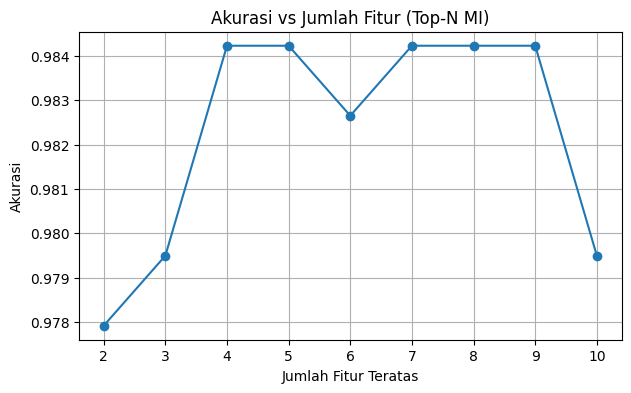

In [4]:

feat_counts = list(results.keys())
acc_values = [results[n][0] for n in feat_counts]

plt.figure(figsize=(7,4))
plt.plot(feat_counts, acc_values, marker="o")
plt.xlabel("Jumlah Fitur Teratas")
plt.ylabel("Akurasi")
plt.title("Akurasi vs Jumlah Fitur (Top-N MI)")
plt.grid(True)
plt.show()



## Kesimpulan

### **Fitur terbaik (Top-4 MI):**
- meanfun  
- IQR  
- Q25  
- sd  

### **k terbaik:**  
- **k = 9**

### **Akurasi terbaik:**  
- **98.42%**
